## Credit Risk Evaluator<br>
Submitted by: Ricardo G. Mora, Jr.<br><br>
This notebook compares the performance of two Supervised Learning models: Logistic Regression and Random Forest.<br>
The data used to train and test the models will first be unscaled, and then another comparison will be made using scaled data.<br>
Data is provided courtesy of the Lending Club (https://resources.lendingclub.com).

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Load and prepare data

In [2]:
# Use the loan data from all of 2019 as the training data.
# Use the loan data from just Q1 of 2020 as the testing data.
# Load in the data:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Examine training data:
train_df.head(2)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk


In [4]:
# Examine testing data:
test_df.head(2)

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N,low_risk
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N,low_risk


In [5]:
# Convert categorical data to numeric and separate target feature for training data:
X_train = pd.get_dummies(train_df.drop(columns=['target']))
y_train = train_df['target']

In [6]:
# Examine "one hot" modifications to training data:
X_train.head(2)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,7000.0,0.1894,256.38,75000.0,28.62,0.0,2.0,20.0,0.0,40414.0,...,0,1,1,0,1,0,1,0,1,0
1,40000.0,0.1614,975.71,102000.0,11.72,2.0,0.0,10.0,0.0,43531.0,...,0,1,0,1,1,0,1,0,1,0


In [7]:
# Examine y_train:
print(y_train.describe())

count         12180
unique            2
top       high_risk
freq           6090
Name: target, dtype: object


In [8]:
# Convert categorical data to numeric and separate target feature for testing data:
X_test = pd.get_dummies(test_df.drop(columns=['target']))
y_test = test_df['target']

In [9]:
# Examine "one hot" modification to testing data:
X_test.head(2)

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.1033,856.40,128700.0,12.47,0.0,1.0,8.0,0.0,38113.0,...,1,0,1,0,1,1,0,0,1,1
1,24450.0,0.1430,572.72,44574.0,15.05,0.0,1.0,6.0,0.0,1665.0,...,0,0,1,0,1,1,0,1,0,1


In [10]:
# Examine y_test:
print(y_test.describe())

count          4702
unique            2
top       high_risk
freq           2351
Name: target, dtype: object


In [11]:
# The "one hot" modification added more columns to the training data than to the testing data.
# Add missing columns to testing data and populate with dummy values:
for column in X_train.columns:
    if column not in X_test.columns:
        X_test[column] = 0

### Logistic Regression Model with Unscaled Data
This model will probably perform the worst because of the large difference in magnitudes of the various features (ie: loan amount vs. interest rate).

In [12]:
# Train the Logistic Regression model on the unscaled data and print the model score:
LRUclassifier = LogisticRegression()
LRUclassifier.fit(X_train, y_train)

LRUscore = LRUclassifier.score(X_test, y_test)
print(f"Unscaled Logistic Regression Model's Score: {LRUscore:.3f}")

Unscaled Logistic Regression Model's Score: 0.511


<AxesSubplot:title={'center':'Most Influential Features for Unscaled Logistic Regression Model\nScore: 0.511'}>

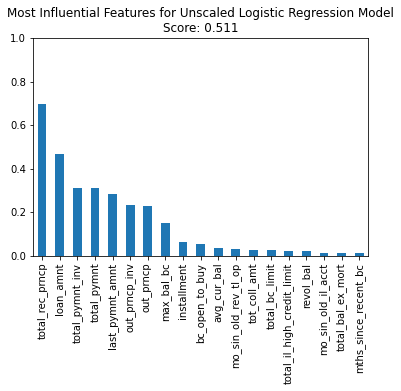

In [13]:
LRUfeature_importance = abs(LRUclassifier.coef_[0])
LRUfeature_importance = LRUfeature_importance / LRUfeature_importance.max()
LRUfeature_importance = pd.Series(LRUfeature_importance, index=X_train.columns).sort_values(ascending=False)
LRUfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.2,.4,.6,.8,1],
                                 title=f'Most Influential Features for Unscaled Logistic Regression Model\nScore: {LRUscore:.3f}')

### Random Forest Model with Unscaled Data
This model will probably be the second worst performer because of the large number of features (83), many of which probably don't have any actual influence on the outcome.

In [14]:
# Train a Random Forest Classifier model and print the model score:
RFUclassifier = RandomForestClassifier()
RFUclassifier.fit(X_train, y_train)

RFUscore = RFUclassifier.score(X_test, y_test)
print(f"Unscaled Random Forest Model's Score: {RFUscore:.3f}")

Unscaled Random Forest Model's Score: 0.642


<AxesSubplot:title={'center':'Most Influential Features for Unscaled Random Forest Model\nScore: 0.642'}>

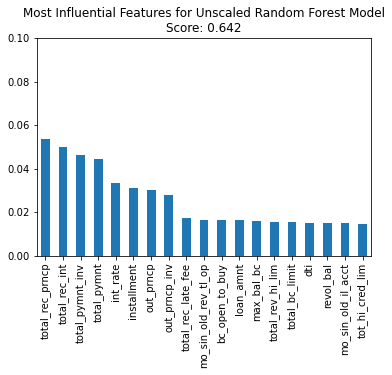

In [15]:
RFUfeature_importance = pd.Series(RFUclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
RFUfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.02,.04,.06,.08,.1],
                                 title=f'Most Influential Features for Unscaled Random Forest Model\nScore: {RFUscore:.3f}')

### Logistic Regression Model with Scaled Data
This model will probably be the second best performer because scaling will boost the effectiveness of small-valued actual influential features and reduce the effect of large-valued non-relevent features.  However, there is still too many features to confuse this model.

In [16]:
# Scale the data:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Train the Logistic Regression model on the scaled data and print the model score:
LRSclassifier = LogisticRegression()
LRSclassifier.fit(X_train_scaled, y_train)

LRSscore = LRSclassifier.score(X_test_scaled, y_test)
print(f"Scaled Logistic Regression Model's Score: {LRSscore:.3f}")

Scaled Logistic Regression Model's Score: 0.760


<AxesSubplot:title={'center':'Most Influential Features for Scaled Logistic Regression Model\nScore: 0.760'}>

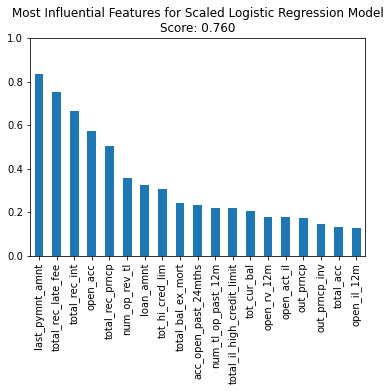

In [18]:
LRSfeature_importance = abs(LRSclassifier.coef_[0])
LRSfeature_importance = LRSfeature_importance / LRSfeature_importance.max()
LRSfeature_importance = pd.Series(LRSfeature_importance, index=X_train.columns).sort_values(ascending=False)
LRSfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.2,.4,.6,.8,1],
                                 title=f'Most Influential Features for Scaled Logistic Regression Model\nScore: {LRSscore:.3f}')

### Random Forest Model with Scaled Data
This model will probably perform the best because scaling will boost the effectiveness of small-valued actual influential features and reduce the effect of large-valued non-relevent features.  And the large number of data points (over 12,000) will reduce the confusion introduced by the large number of features.

In [19]:
# Train a Random Forest Classifier model on the scaled data and print the model score:
RFSclassifier = RandomForestClassifier()
RFSclassifier.fit(X_train_scaled, y_train)

RFSscore = RFSclassifier.score(X_test_scaled, y_test)
print(f"Scaled Random Forest Model's Score: {RFSscore:.3f}")

Scaled Random Forest Model's Score: 0.650


<AxesSubplot:title={'center':'Most Influential Features for Scaled Random Forest Model\nScore: 0.650'}>

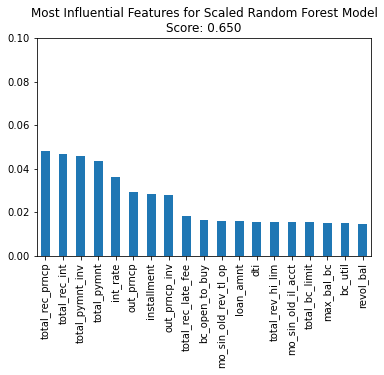

In [20]:
RFSfeature_importance = pd.Series(RFSclassifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
RFSfeature_importance[1:20].plot(kind='bar',
                                 yticks=[0,.02,.04,.06,.08,.1],
                                 title=f'Most Influential Features for Scaled Random Forest Model\nScore: {RFSscore:.3f}')

### Conclusion:
This data set contained a large number of features (83) which probably introduced a lot of noise to confuse both models.  As predicted, the Logistic Regression Model using unscaled features performed the worst with an Accuracy Score of 0.511.  As expected, that model's Accuracy Score improved to 0.760 when using scaled data to train and test it.  It is interesting to note that features you would expect to be influential (like Loan Amount and Total Payment) became less relevent after using the scaled data.  The surprising result was that using scaled data had little effect on the Accuracy Score for the Random Forest Model (0.642 to 0.650), even after running it several times. It would be interesting to see if using the Extra Trees Model with Adaptive Boosting can outperform either of the two models used above.